In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score  # Works only for classification task
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # To avoid warning messages.

In [2]:
data = pd.read_csv("titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# First, we have to remove columns which are not needed to predict.
# We will consider only the next ones. The target here is 'Survived' column.
df = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
# see columns with NaN values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
#Imputing the mean value to the column 'Age' for those NaN values and later transform them as int type
df.Age.fillna(value=df.Age.mean(), inplace=True)
df.Age = df.Age.astype(int)

# imputing the mode (mosrt frequent value) to the column Embarked.
df.Embarked.fillna(value=df.Embarked.mode()[0], inplace=True)

# print dataframe
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,29,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [6]:
# Due to 'Sex' and 'Embarked' are nominal categorical variables (no order can be established between values for each variable),
# then the best practice is to create new columns using get_columns (and delete the original ones) instead of using Label Encoding.

df = pd.get_dummies(df, columns=['Sex'], dtype=int, drop_first=True)
df = pd.get_dummies(df, columns=['Embarked'], dtype=int, drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1
887,1,1,19,0,0,30.0000,0,0,1
888,0,3,29,1,2,23.4500,0,0,1
889,1,1,26,0,0,30.0000,1,0,0


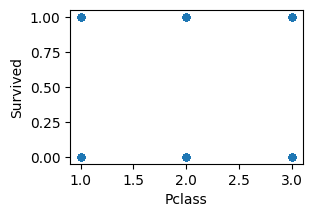

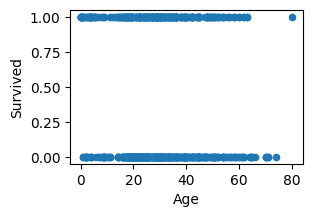

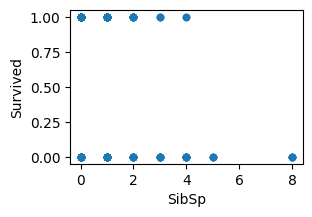

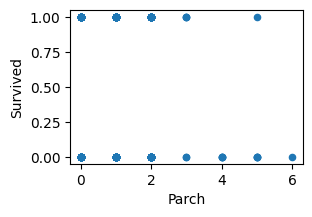

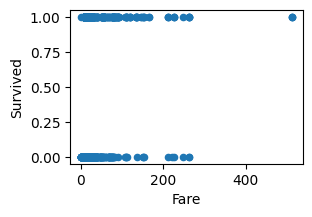

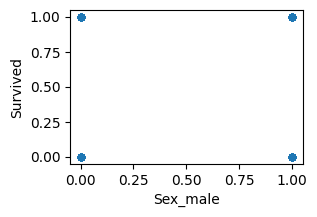

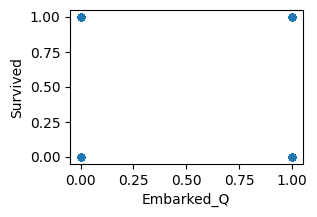

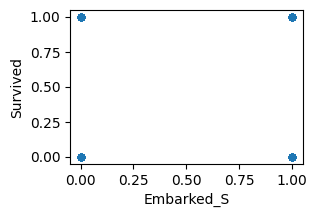

In [7]:
for column in df.columns:
    if column != "Survived":
        df.plot.scatter(x=column, y="Survived", figsize=(3, 2))

In [8]:
# delete outlier
df = df.query("Fare < 400")

In [9]:
# Separate features and target variables
y = df[['Survived']]
X = df.drop(y, axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# fit the model without pre-scaling due to based-tree estimators are not affected by scaling.
estimator = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=10, random_state=42,
                                   )
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [12]:
# Calculating the accuracy score on the test sample
score_accuracy = accuracy_score(y_true=y_test, y_pred=estimator.predict(X_test))
score_accuracy

0.7865168539325843

In [13]:
print(export_text(estimator, feature_names=X.columns))

|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Embarked_S <= 0.50
|   |   |   |--- class: 1
|   |   |--- Embarked_S >  0.50
|   |   |   |--- Age <= 3.00
|   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pclass >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  3.00
|   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  23.50
|   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |--- Age <= 26.00
|   |   |   |   |   |   |   |--- SibSp <= 1.50
|   |   |   |   |   |   |   |   |--- Fare <= 108.28
|   |   |   |   |   |   |   |   |   |--- Fare <= 13.75
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Fare >  13.75
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Fare >  108.28
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SibSp >  1.50
|   |   |   |   | 

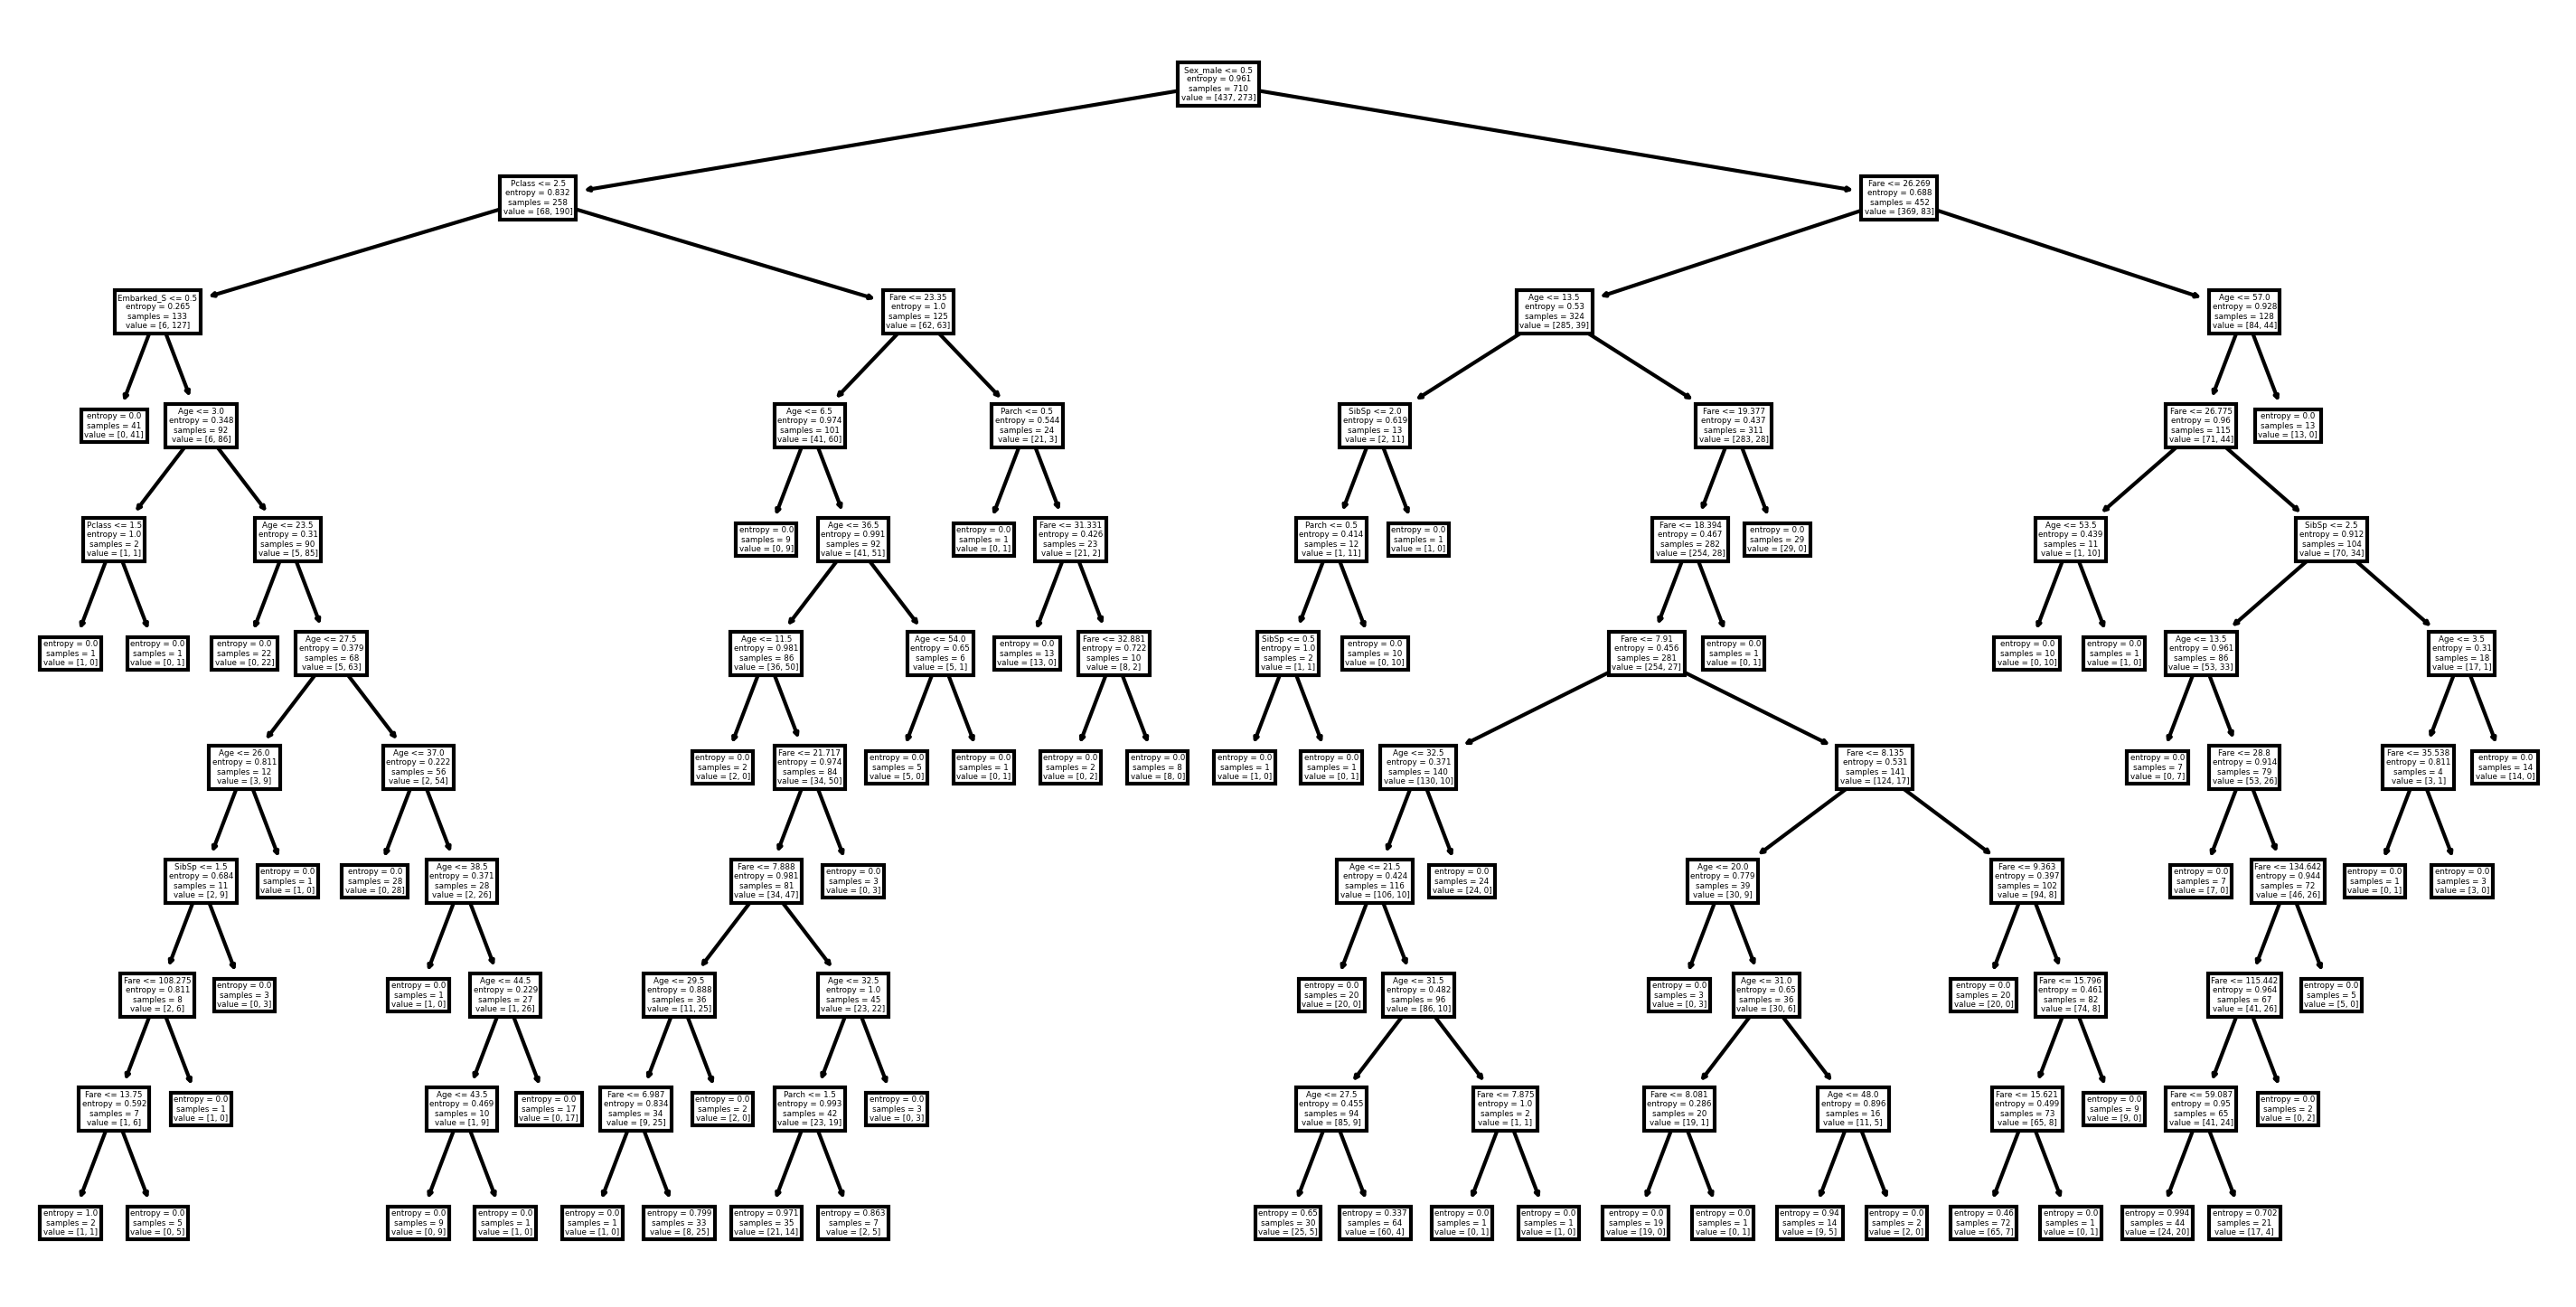

In [14]:
plt.figure(figsize=(12, 6), dpi=300)
plot_tree(estimator, feature_names=list(X.columns))
plt.show()

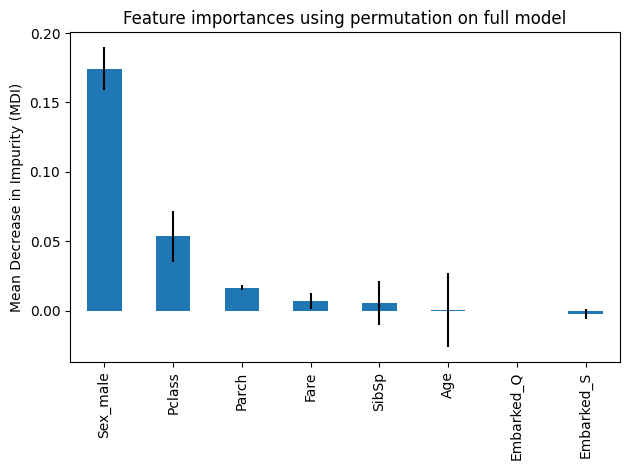

In [15]:
result = permutation_importance(estimator, X_test, y_test, n_repeats=100, random_state=42, n_jobs=-1)
tree_importances = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot of importances
fig, ax = plt.subplots()
tree_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean Decrease in Impurity (MDI)")
fig.tight_layout()
plt.show()

In [16]:
# The cross validation is applied on the training sample.
cv_score = cross_val_score(estimator=estimator,
                           X=X_train, y=y_train.values.ravel(), cv=10, n_jobs=-1)

cv_score_mean = round( cv_score.mean()*100, 2 )
cv_score_std  = round( cv_score.std()*100, 2 )

print(f'({cv_score_mean} +- {cv_score_std})%')

(81.55 +- 4.61)%


In [17]:
estimator_new = DecisionTreeClassifier(random_state=42)

param_grid = {"criterion": ("gini", "entropy", "log_loss"),
              "max_depth": (4, 6, 8, 10, 12),
              }
# GridSearch Cross Validation
search = GridSearchCV(estimator=estimator_new,
                      param_grid=param_grid,
                      scoring="accuracy",
                      cv=5,      # number of crossVal folds.
                      n_jobs=-1) # Using all cores for processing

# Here, we also use cross validation via 'cv' param in GridSearchCV.

# Fit the model evaluating the grid of params
search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (4, 6, 8, 10, 12)},
             scoring='accuracy')

In [18]:
print(f'best params: {search.best_params_}')
print(f'best score: {search.best_score_}')

cv_GridScore_mean = round( search.cv_results_["mean_test_score"].mean()*100 , 2)
cv_GridScore_std  = round( search.cv_results_["std_test_score"].mean()*100 , 2)

print(f'mean score: ({cv_GridScore_mean} +- {cv_GridScore_std})')

best params: {'criterion': 'entropy', 'max_depth': 6}
best score: 0.8197183098591548
mean score: (80.6 +- 3.31)


In [19]:
def selecting_features(k):

    # we will do the same exercise but now using the 4 most contributing variables and the best hyperparams
    X_shorted = df[tree_importances.index[:k]]

    # re-define our training and test samples and split them
    X_train, X_test, y_train, y_test = train_test_split(X_shorted, y, test_size=0.2)

    estimator = DecisionTreeClassifier(criterion='gini',
                                       max_depth=6,
                                       random_state=42,
                                       )

    estimator.fit(X_train, y_train.values.ravel())

    score_fit = estimator.score(X_train, y_train)
    accuracy = accuracy_score(y_true=y_test, y_pred=estimator.predict(X_test))
    return accuracy

In [24]:
k_values = range(1, len(X.columns)+1)
accuracy_list = [selecting_features(k) for k in k_values]
accuracy_average = sum(accuracy_list)/len(accuracy_list)

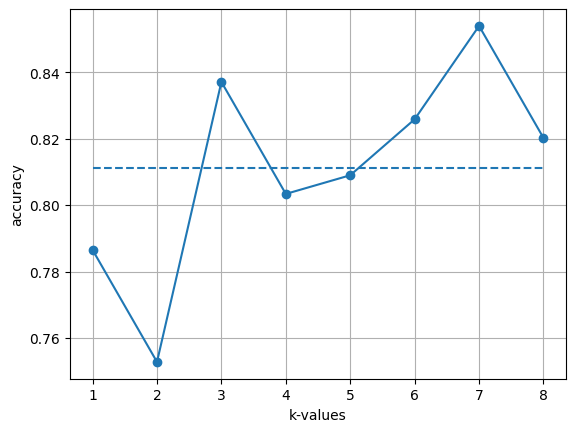

In [28]:
plt.plot(k_values, accuracy_list, marker='o')
plt.hlines(y=accuracy_average, xmin=k_values[0], xmax=k_values[-1], linestyles='--')
plt.ylabel("accuracy")
plt.xlabel("k-values")
plt.grid()
plt.show()